# Challenge: QUBO


[<img src="https://qbraid-static.s3.amazonaws.com/logos/Launch_on_qBraid_white.png" width="150">](https://account.qbraid.com?gitHubUrl=https://github.com/qosf/monthly-challenges.git)


Quantum computing is used extensively for modelling and solving combinatorial optimisation issues. The purpose of this is to find a problem with binary clauses where the amount of states is immense and, in order to uncover the correct answers, quantum computing produces algorithms of NP-complexity. On the other hand, in quantum computing, we are interested in representing such a model in a quantum circuit and being able to find the optimal states that satisfy the cost function using a classical optimizer.

Multiple companies work around computers and generate an SDK that can generate quantum circuits, in this challenge, we focus on a fundamental step of the Quantum Approximate Optimization Algorithm (QAOA) algorithm, before starting the quantum part one must model a problem in terms of 0 and 1 and convert it into a Quadratic unconstrained binary optimization (QUBO) and this convert it to an Ising model to find the optimal states. To validate the model one makes use of OpenQAOA, an SDK focused on circuitry of the QAOA algorithm. If you want to know more about this SDK you can check the following link https://openqaoa.entropicalabs.com/ 

### Note 

To run on real QPU and simulators use  [qbraid](https://account.qbraid.com/) and send them a dm on their [discord server](https://discord.gg/S99GJBfr) to get credits!

## The Knapsack problem


This challenge is based on the hybrid algorithm QAOA which is based on a variational circuit which will be modified to find the minimum energy by means of a classical optimizer and from the states with the highest probability we will have at least one state that satisfies the conditions of the cost function we use, being based on the knapsack problem.

![QAOA](images/QAOA.png)
<center>Figure 1. General quantum circuit of QAOA </center>



The knapsack problem asks us to find a combination of items such that the total weight is within the capacity of the knapsack and maximize the total value of the items. The Knapsack problem is the simplest nontrivial integer programming model with binary variables, only one constraint and only positive coefficients. 

It is formally defined as follows: We are given an instance of the knapsack problem with the set of items  $N^{\prime}=\{1, \ldots, N\}$, consisting of $N$ items, the $j$-th with profit $p_{j}$ and weight $w_{j}$, and the capacity value $W$. Then, the objective is to select a subset of $N^{\prime}$ such that the total profit of the selected items is maximized and the total weight does not exceed $W$.
$$
\begin{aligned}
\operatorname{maximizar} & \sum_{j=1}^{N} p_{j} x_{j} \\
\text { sujeto a } & \sum_{j=1}^{N} w_{j} x_{j} \leq W \\
& x_{j} \in\{0,1\}, \quad j=1, \ldots, N
\end{aligned}
$$
Let us denote the optimal solution vector by $x^{*}=\left(x_{i}^{*}, \ldots, x_{N}^{*}\right)$ y el valor de solución óptima por $z^{*}$ and the optimal solution value by $z^{*}$. The set $X^{*}$ denotes the optimal solution set, i.e., the set of elements corresponding to the optimal solution vector.

![knapsack problem](images/knapsack_model.png)
<center>Figure 2. Representation of the knapsack model </center>


### Resources

For some guidelines on the objective of this challenge and its passage to a quantum circuit you can consult the following sources, including the original paper explaining this algorithm, as well as some tutorials from different frameworks.

[1] Edward Farhi and Jeffrey Goldstone. (2014). A Quantum Approximate Optimization Algorithm [[4028]](https://arxiv.org/pdf/1411.4028.pdf).

[2] [Qiskit Code](https://learn.qiskit.org/course/ch-applications/solving-combinatorial-optimization-problems-using-qaoa).

[3] [Qiskit Application](https://github.com/qiskit-community/ibm-quantum-challenge-fall-2021/blob/main/solutions-by-authors/challenge-4/challenge-4.ipynb)

[4] [Pennylane Tutorial](https://pennylane.ai/qml/demos/tutorial_qaoa_intro.html)

[5] [Pyquil Tutorial](https://grove-docs.readthedocs.io/en/latest/qaoa.html)

[6] [QUBO's tutorial paper](https://arxiv.org/pdf/1811.11538.pdf)


## Using OpenQAOA

Considering the examples based on OpenQAOA, we already have different classes and methods that facilitate the construction of quantum circuits, but how to generate a QUBO we will rely on docplex. For more information on QAOA examples and how to generate QUBOs, please click [here](https://github.com/entropicalabs/openqaoa/tree/main/examples).

In [38]:
%matplotlib notebook

# Import external libraries to present an manipulate the data
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Import docplex model to generate the problem to optimize
from docplex.mp.model import Model

# Import the libraries needed to employ the QAOA quantum algorithm using OpenQAOA
from openqaoa import QAOA

# method to covnert a docplex model to a qubo problem
from openqaoa.problems.converters import FromDocplex2IsingModel #check this method and properties
from openqaoa.backends import create_device

# method to find the corrects states for the QAOA boject 
from openqaoa.utilities import ground_state_hamiltonian

In [39]:
values =  [3,6,3,4,5]
weights = [3,5,6,2,4]
max_weight = 13

In [40]:
def Knapsack(values,weights, max_weight):
    
    #init a model
    mdl = Model(name="Knapsack")

    # indicate the binary variables
    n_vars = len(values)
    x = mdl.binary_var_list(n_vars, name="x")

    # define the objective function
    obj_func = sum([values[i] * x[i] for i in range(n_vars)])
    mdl.maximize(obj_func)

    # add  the constraints
    mdl.add_constraint(sum(weights[i] * x[i] for i in range(n_vars)) <= max_weight)
    
    return FromDocplex2IsingModel(model=mdl)

In [41]:
knapsack =  Knapsack(values, weights, max_weight)

# Ising encoding of the QUBO problem for knapsack problem
ising_encoding = knapsack.ising_model

# Docplex encoding of the QUBO problem for knapsack problem
mdl_qubo_docplex = knapsack.qubo_docplex

mdl_qubo_docplex.prettyprint()

// This file has been generated by DOcplex
// model name is: Knapsack
// var contrainer section
dvar bool x[5];
dvar bool slack_C0[4];

// single vars section
dvar bool x_0;
dvar bool x_1;
dvar bool x_2;
dvar bool x_3;
dvar bool x_4;
dvar bool slack_C0_0;
dvar bool slack_C0_1;
dvar bool slack_C0_2;
dvar bool slack_C0_3;

minimize
 - 1719 x_0 - 2866 x_1 - 3435 x_2 - 1148 x_3 - 2293 x_4 - 572 slack_C0_0
 - 1144 slack_C0_1 - 2288 slack_C0_2 - 3432 slack_C0_3 [ 198 x_0^2
 + 660 x_0*x_1 + 792 x_0*x_2 + 264 x_0*x_3 + 528 x_0*x_4 + 132 x_0*slack_C0_0
 + 264 x_0*slack_C0_1 + 528 x_0*slack_C0_2 + 792 x_0*slack_C0_3 + 550 x_1^2
 + 1320 x_1*x_2 + 440 x_1*x_3 + 880 x_1*x_4 + 220 x_1*slack_C0_0
 + 440 x_1*slack_C0_1 + 880 x_1*slack_C0_2 + 1320 x_1*slack_C0_3 + 792 x_2^2
 + 528 x_2*x_3 + 1056 x_2*x_4 + 264 x_2*slack_C0_0 + 528 x_2*slack_C0_1
 + 1056 x_2*slack_C0_2 + 1584 x_2*slack_C0_3 + 88 x_3^2 + 352 x_3*x_4
 + 88 x_3*slack_C0_0 + 176 x_3*slack_C0_1 + 352 x_3*slack_C0_2
 + 528 x_3*slack_C0_3 + 352

In [42]:
# Initilize the QAOA object
qaoa = QAOA()

# Set the parameters to work the QAOA algorithm
# where n_shots =1024 and  seed_simulator=1
qaoa.set_backend_properties(n_shots=1024, seed_simulator=1)

#p = 1, a custom type and range from 0 to pi
qaoa.set_circuit_properties(p=1, init_type="custom", variational_params_dict={'betas':0, 'gammas':0})

qaoa.compile(ising_encoding)

# Run the QAOA algorithm
qaoa.optimize()

pd.DataFrame(qaoa.result.lowest_cost_bitstrings(5))

,solutions_bitstrings,bitstrings_energies,probabilities
0,010110100,-15.0,0.001985
1,110011000,-14.0,0.001985
2,110101100,-13.0,0.001985
3,011100000,-13.0,0.001985
4,001111000,-12.0,0.001985


In [43]:
# To find the correct answer using ground_state_hamiltonian
# and  the paremeter is a cost_hamiltonian
correct_solution = ground_state_hamiltonian(qaoa.cost_hamil)
correct_solution

(-15.0, ['010110100'])

Valid your answer using docplex, you can see how to check the classical solution using the following tutorial [here](https://github.com/entropicalabs/openqaoa/blob/main/examples/community_tutorials/02_docplex_example.ipynb) 

In [44]:
## docplex solution
sol = mdl_qubo_docplex.solve()
mdl_qubo_docplex.print_solution(print_zeros=True)

objective: -15.000
status: OPTIMAL_SOLUTION(2)
  x_0=0
  x_1=1
  x_2=0
  x_3=1
  x_4=1
  slack_C0_0=0
  slack_C0_1=1
  slack_C0_2=0
  slack_C0_3=0


## Part 2: Improve the quantum circuit

Perform the same process as above now with the variant of using different backends, p values, and different optimizers until you find the one that can provide the correct answers with the least number of iterations, quantum circuit depth.

In [45]:
from copy import copy

# https://jugit.fz-juelich.de/qip/unbalanced-penalizations-qubo/-/blob/main/helper_functions.py#L172
"""
The reason for applying normalization to the weights or values in the context of the QAOA 
is to ensure that the optimization algorithm operates effectively and consistently across 
different scales of the problem variables.
"""
def normalization(problem, normalized=-1, periodic=False):
    """
    Parameters
    ----------
    problem : TYPE
        DESCRIPTION.
    normalized : TYPE, optional
        DESCRIPTION. The default is -1.
    periodic : TYPE, optional
        DESCRIPTION. The default is False.

    Returns
    -------
    new_problem : TYPE
        DESCRIPTION.

    """
    abs_weights = np.unique(np.abs(problem.weights))
    arg_sort = np.argsort(abs_weights)
    max_weight = abs_weights[arg_sort[normalized]]
    new_problem = copy(problem)
    if periodic:
        new_problem.weights = [weight // max_weight for weight in new_problem.weights]
    else:
        new_problem.weights = [weight / max_weight for weight in new_problem.weights]
    new_problem.constant /= max_weight
    return new_problem

def plot_optimization(times_vectorized, times_qiskit):
    ps = range(1, 9)
    figure = plt.figure(figsize=(9,6))
    plt.plot(ps, times_vectorized, color='red', ls='-.', marker='x', label = 'vectorized')
    plt.plot(ps, times_qiskit, ls = ':', marker = 'p', label='qiskit.qasm_simulator')
    plt.xlabel('Depth (p)')
    plt.ylabel('Time (s)')
    plt.title('9-qubits circuit optimization with COBYLA and maxiter=100')
    plt.legend(fontsize=12);
    
def plot_cost(qaoa_vectorized, qaoa_qiskit):
    fig, axs = plt.subplots(4, 2, figsize=(11,10))
    fig.suptitle('Cost history')
    fig.tight_layout(pad=3.0)
    item_index = 0
    for rows in range(4):
        for cols in range(2):
            q_vector, q_qiskit = qaoa_vectorized[item_index], qaoa_qiskit[item_index]

            q_vector.result.plot_cost(label=f'Vectorized', color='red', ax=axs[rows, cols])
            q_qiskit.result.plot_cost(label='Qiskit QASM Simulator', color='green', ax=axs[rows, cols])

            item_index = item_index + 1

    item_index = 1
    for ax in fig.get_axes():
        ax.set_title(f'p={item_index}')
        item_index = item_index + 1
        
def number_of_evaluations(qaoa_vectorized, qaoa_qiskit):
    i = 0
    print("Number of function evaluations for Vectorized and Qiskit QASM Simulator")
    for q_vector, q_qiskit in zip(qaoa_vectorized, qaoa_qiskit):
        print(f"p={i + 1}: {q_vector.result.optimized['eval_number']} {q_qiskit.result.optimized['eval_number']}")
        i = i + 1

In [46]:
betas, gammas = {}, {}
for p in range(1, 9):
    betas[p] = np.random.uniform(0, np.pi, size=p)
    gammas[p] = np.random.uniform(0, np.pi, size=p)

In [47]:
def create_QAOA(simulator, p = 1, method = 'cobyla', n_shots = 1024) -> QAOA:
    # Initilize the QAOA object and use a device
    device = create_device("local", name=simulator)

    qaoa = QAOA(device)

    # Set the parameters to work the QAOA algorithm
    # play with the parameters values
    qaoa.set_backend_properties(n_shots=n_shots, seed_simulator=357)

    qaoa.set_circuit_properties(
        p=p,
        param_type='standard',
        init_type="custom",
        variational_params_dict={'betas':betas[p], 'gammas':gammas[p]}
    )
    
    maxiter = 100
    tol = 1e-7
    # https://docs.scipy.org/doc/scipy/reference/optimize.minimize-neldermead.html#optimize-minimize-neldermead
    if method == 'nelder-mead':
        qaoa.set_classical_optimizer(
            method='nelder-mead',
            maxiter=maxiter,
            tol=0.0001
        )
    # https://openqaoa.entropicalabs.com/optimizers/shot-adaptive-optimizers/#coupled-adaptive-number-of-shots-cans
    elif method == 'cans':
        qaoa.set_classical_optimizer(
            method='cans', 
            jac="param_shift", 
            maxiter=maxiter,
            optimizer_options=dict( 
                stepsize=0.0001,
                n_shots_min=5,
                n_shots_max=200,
                n_shots_budget=1000,
            )
        )
    # https://docs.scipy.org/doc/scipy/reference/optimize.minimize-cobyla.html#optimize-minimize-cobyla
    else:
        qaoa.set_classical_optimizer(
            method='cobyla',
            maxiter=maxiter,
            tol=tol)
    return qaoa

In [48]:
qaoa_vectorized1  = []
qaoa_qiskit1      = []

In [49]:
## implementation
for p in range(1, 9):
    qaoa = create_QAOA('vectorized', p, method='cobyla')
    qaoa_vectorized1.append(qaoa)

    qaoa = create_QAOA('qiskit.qasm_simulator', p, method='cobyla')
    qaoa_qiskit1.append(qaoa)

In [50]:
times_vectorized1  = []
times_qiskit1      = []

In [51]:
#importing the time module to record time for simulations
from time import time
norm_knapsack = normalization(knapsack.ising_model)
for q_vector, q_qiskit in zip(qaoa_vectorized1, qaoa_qiskit1):
    
    q_vector.compile(norm_knapsack, verbose=False)
    q_qiskit.compile(norm_knapsack, verbose=False)
    
    t1 = time()
    q_vector.optimize()
       
    t2 = time()
    q_qiskit.optimize()
    
    t3 = time()
    
    times_vectorized1.append(t2 - t1)
    times_qiskit1.append(t3 - t2)

<IPython.core.display.Javascript object>


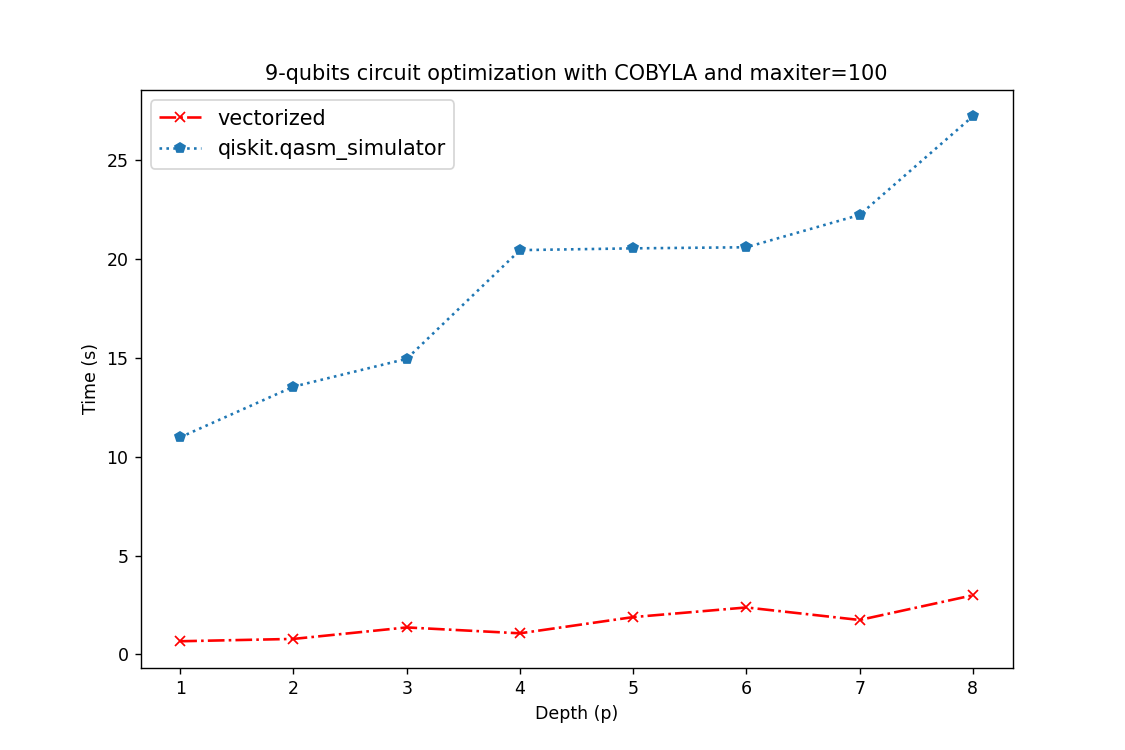

In [66]:
plot_optimization(times_vectorized1, times_qiskit1)

<IPython.core.display.Javascript object>


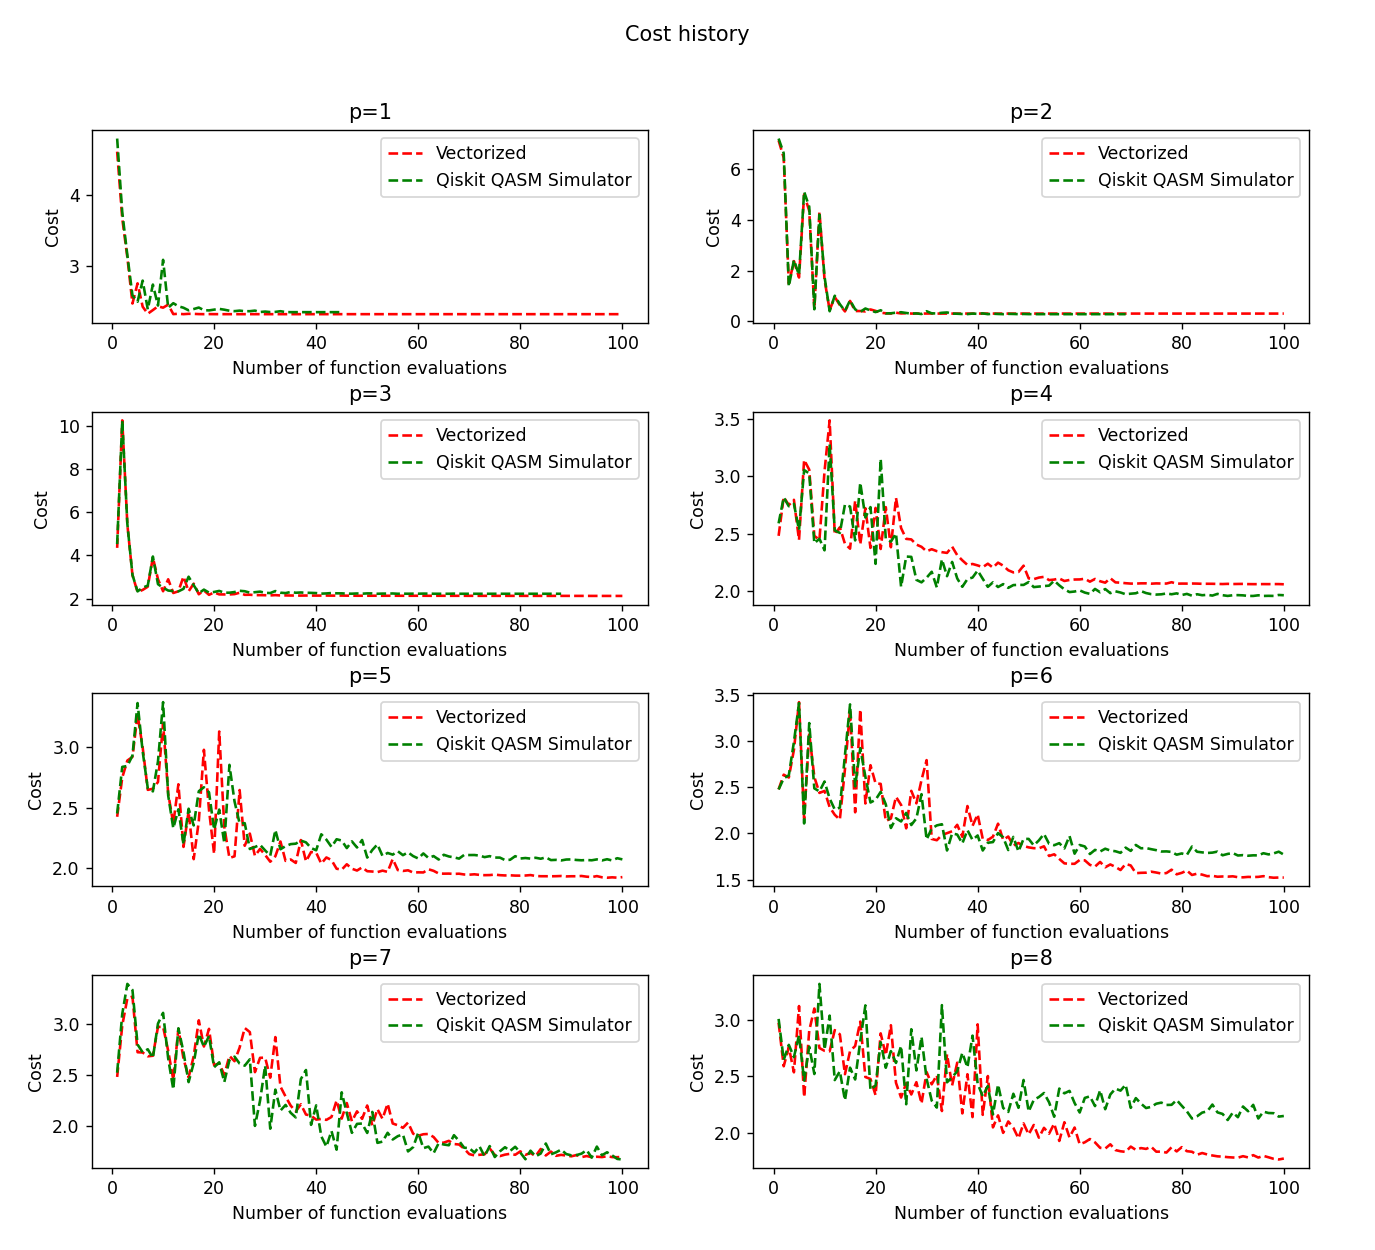

In [67]:
plot_cost(qaoa_vectorized1, qaoa_qiskit1)

In [54]:
number_of_evaluations(qaoa_vectorized1, qaoa_qiskit1)

Number of function evaluations for Vectorized and Qiskit QASM Simulator
p=1: 100 35
p=2: 99 45
p=3: 100 52
p=4: 100 93
p=5: 97 88
p=6: 98 93
p=7: 94 100
p=8: 99 89


In [55]:
qaoa_vectorized2  = []
qaoa_qiskit2      = []

In [56]:
## implementation
for p in range(1, 9):
    qaoa = create_QAOA('vectorized', p, method='nelder-mead')
    qaoa_vectorized2.append(qaoa)

    qaoa = create_QAOA('qiskit.qasm_simulator', p, method='nelder-mead')
    qaoa_qiskit2.append(qaoa)

In [57]:
times_vectorized2  = []
times_qiskit2      = []

In [58]:
for q_vector, q_qiskit in zip(qaoa_vectorized2, qaoa_qiskit2):
    
    q_vector.compile(norm_knapsack, verbose=False)
    q_qiskit.compile(norm_knapsack, verbose=False)
    
    t1 = time()
    q_vector.optimize()
       
    t2 = time()
    q_qiskit.optimize()
    
    t3 = time()
    
    times_vectorized2.append(t2 - t1)
    times_qiskit2.append(t3 - t2)

<IPython.core.display.Javascript object>


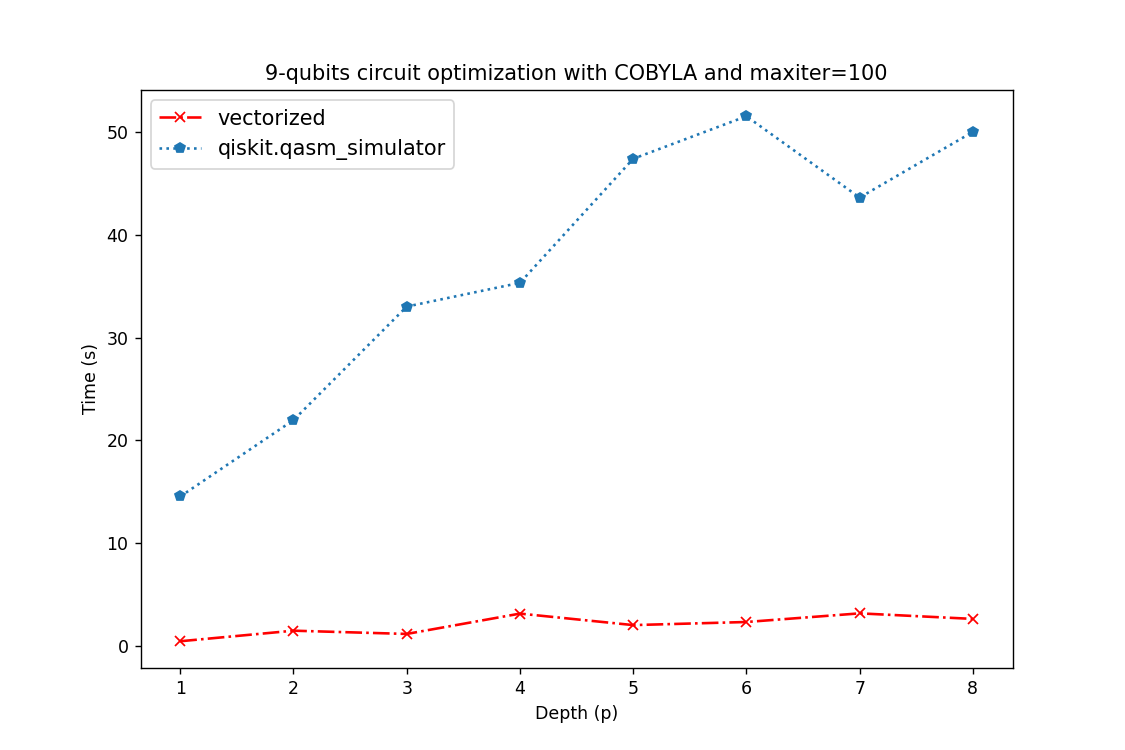

In [59]:
plot_optimization(times_vectorized2, times_qiskit2)

<IPython.core.display.Javascript object>


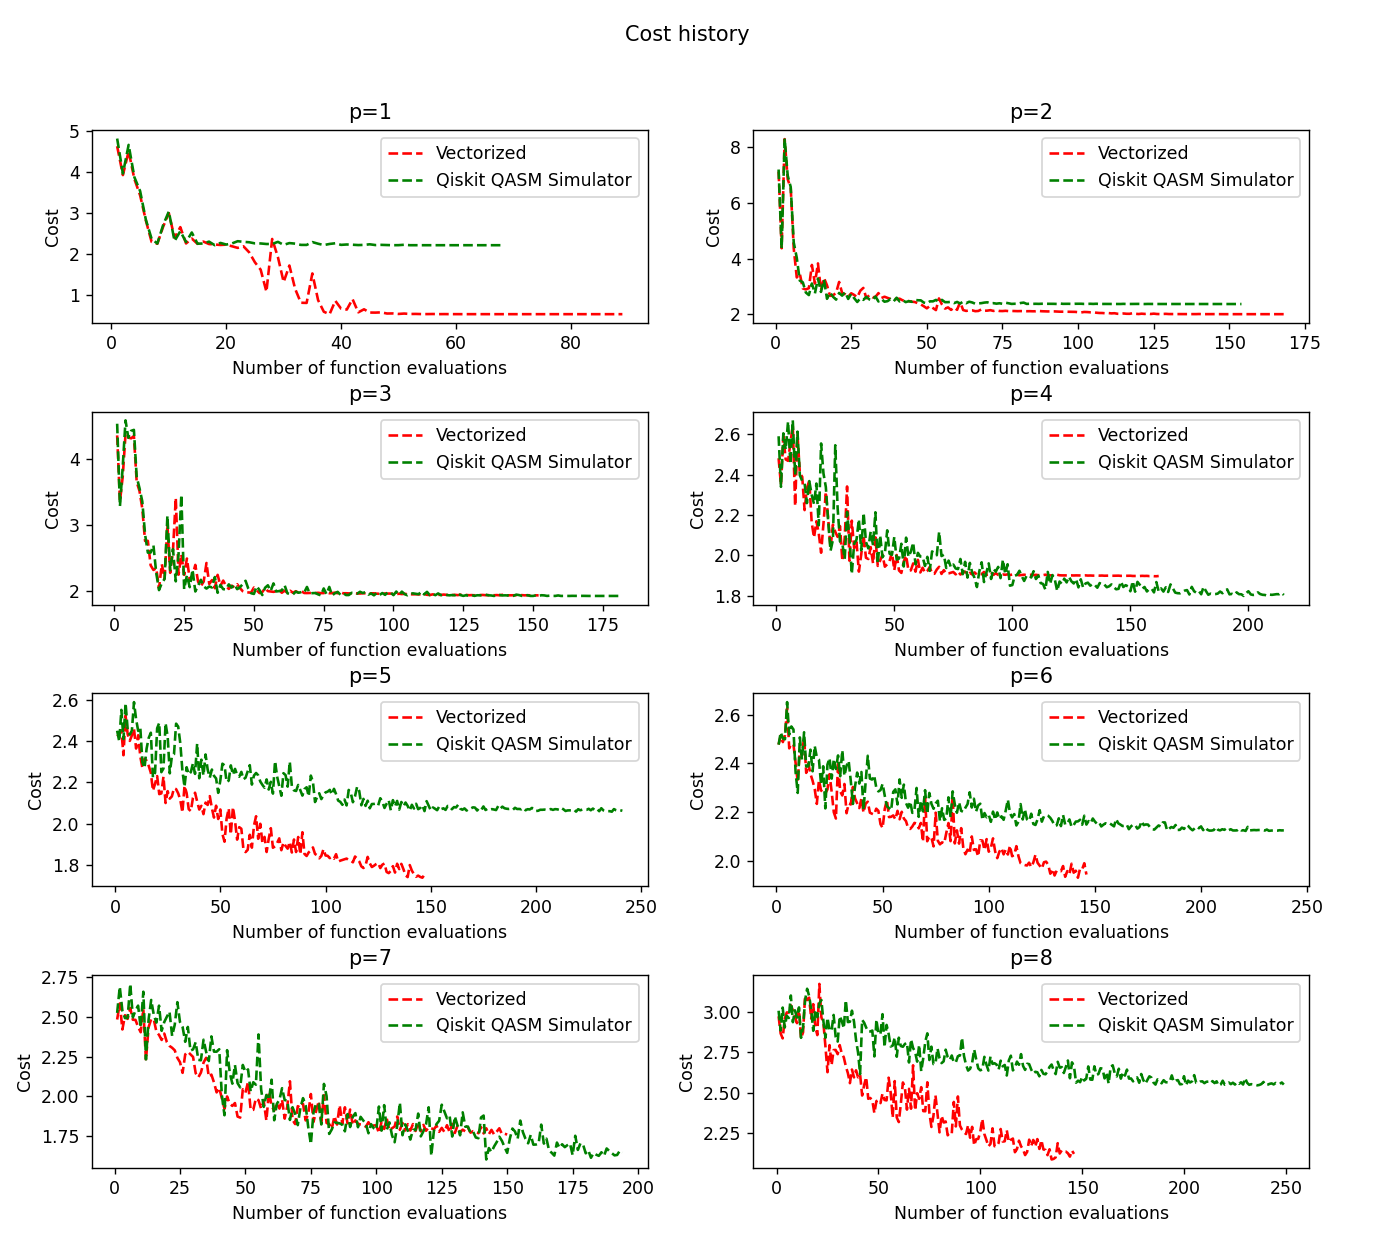

In [60]:
plot_cost(qaoa_vectorized2, qaoa_qiskit2)

In [61]:
number_of_evaluations(qaoa_vectorized2, qaoa_qiskit2)

Number of function evaluations for Vectorized and Qiskit QASM Simulator
p=1: 89 18
p=2: 167 122
p=3: 151 157
p=4: 161 198
p=5: 146 236
p=6: 142 221
p=7: 145 142
p=8: 135 217


In [71]:
qaoa_vectorized3  = []
qaoa_qiskit3      = []

In [72]:
## implementation
for p in range(1, 9):
    qaoa = create_QAOA('vectorized', p, method='cans', n_shots=500)
    qaoa_vectorized3.append(qaoa)

    qaoa = create_QAOA('qiskit.qasm_simulator', p, method='cans', n_shots=500)
    qaoa_qiskit3.append(qaoa)

In [73]:
times_vectorized3  = []
times_qiskit3      = []

In [74]:
for q_vector, q_qiskit in zip(qaoa_vectorized3, qaoa_qiskit3):
    
    q_vector.compile(norm_knapsack, verbose=False)
    q_qiskit.compile(norm_knapsack, verbose=False)
    
    t1 = time()
    q_vector.optimize()
       
    t2 = time()
    q_qiskit.optimize()
    
    t3 = time()
    
    times_vectorized3.append(t2 - t1)
    times_qiskit3.append(t3 - t2)

<IPython.core.display.Javascript object>


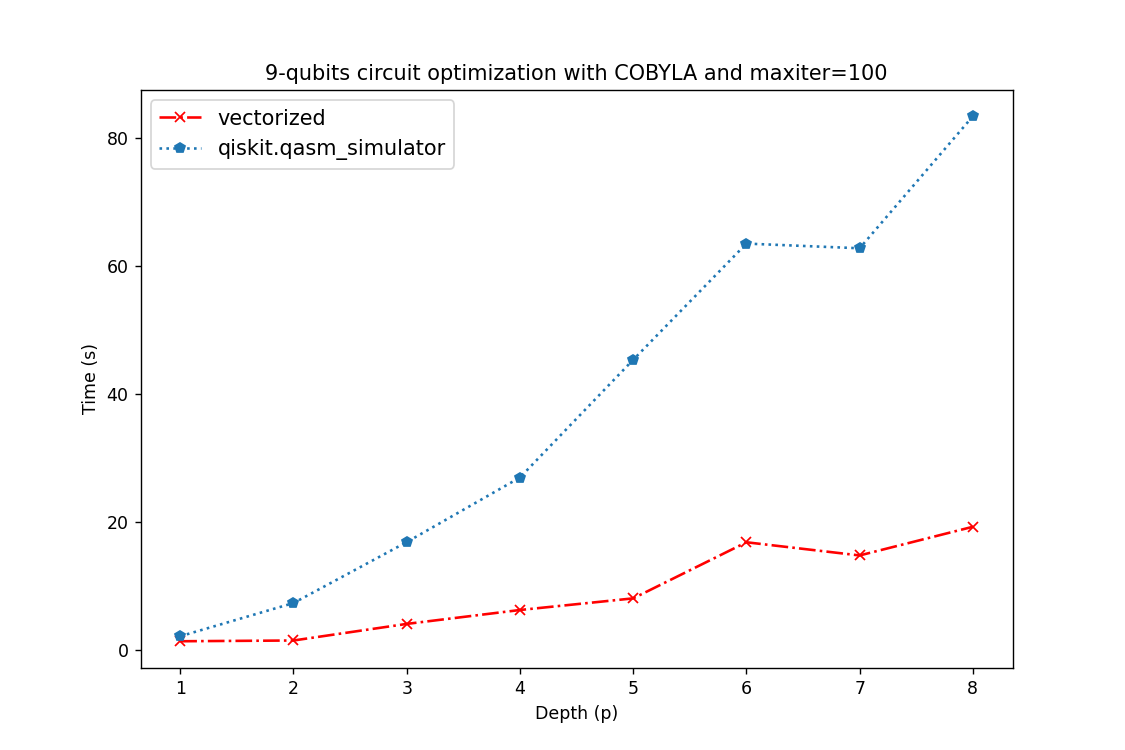

In [75]:
plot_optimization(times_vectorized3, times_qiskit3)

<IPython.core.display.Javascript object>


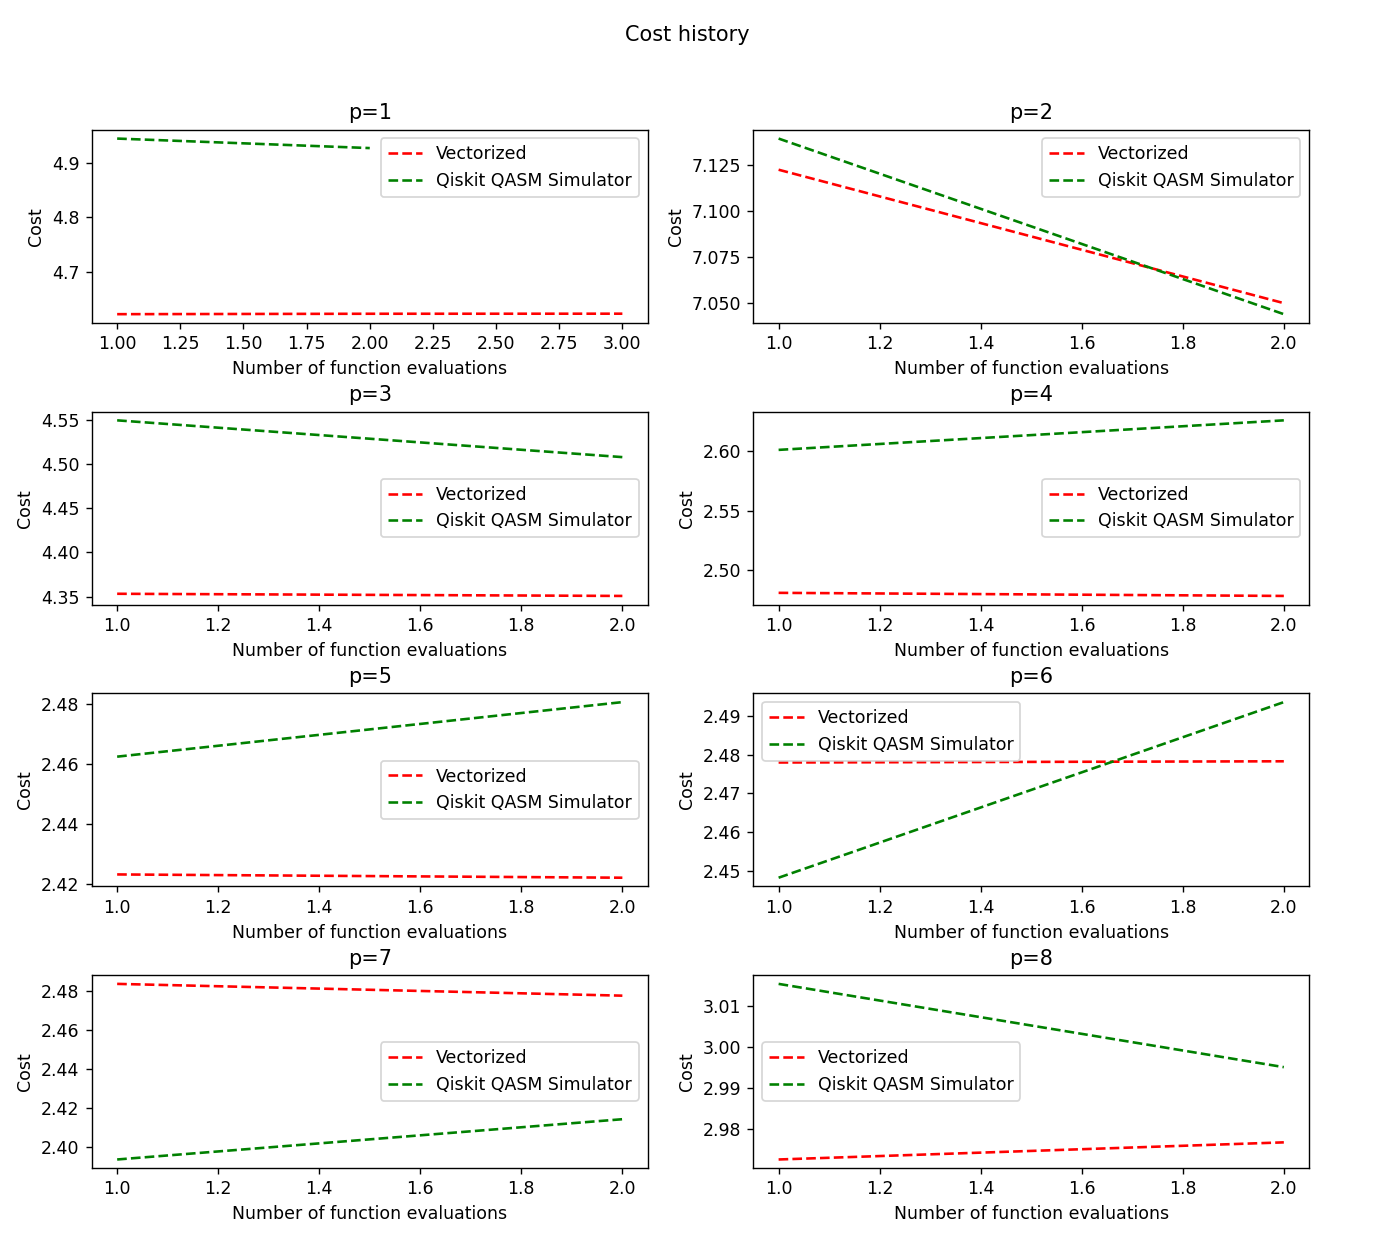

In [76]:
plot_cost(qaoa_vectorized3, qaoa_qiskit3)

In [77]:
number_of_evaluations(qaoa_vectorized3, qaoa_qiskit3)

Number of function evaluations for Vectorized and Qiskit QASM Simulator
p=1: 1 2
p=2: 2 2
p=3: 2 2
p=4: 2 1
p=5: 2 1
p=6: 1 1
p=7: 2 1
p=8: 1 2


## Part 3: Noise Model

The optimal combination that you found with the best optimizer, the lowest number of p's and the correct answer, can give the same answer with noise, use the circuit with a noise model and identify if it gives the same answer.

In [79]:
## implementation using a noise model using qiskit 

## implementation

# Initilize the QAOA object

## real hardware
from qiskit.providers.fake_provider import FakeVigo
from qiskit.providers.aer.noise import NoiseModel
from qiskit.providers.aer import QasmSimulator

device_backend = FakeVigo()
device = QasmSimulator.from_backend(device_backend)
noise_model = NoiseModel.from_backend(device)

device = create_device("local", 'qiskit.qasm_simulator')
qaoa = QAOA(device)

# Set the parameters to work the QAOA algorithm
qaoa.set_backend_properties(n_shots=1024, seed_simulator=357, noise_model=noise_model)

qaoa.set_circuit_properties(
    p=1,
    param_type='standard',
    init_type="custom",
    variational_params_dict={'betas':betas[1], 'gammas':gammas[1]}
)

qaoa.set_classical_optimizer(
    method='cobyla',
    maxiter=100,
    tol=1e-7)

qaoa.compile(ising_encoding)

# Run the QAOA algorithm
qaoa.optimize()

pd.DataFrame(qaoa.result.lowest_cost_bitstrings(5))

,solutions_bitstrings,bitstrings_energies,probabilities
0,110011000,-14.0,0.002930
1,011100000,-13.0,0.000977
2,110101100,-13.0,0.000977
3,100110010,-12.0,0.000977
4,101010000,-11.0,0.016602


## Part 4: New approach

There is a heuristic given by the following [paper](https://arxiv.org/pdf/2211.13914.pdf), try to implement it and identify if it can give the same result

In [80]:
lambda1 = 0.9603 #Preoptimized values (see ref.1)
lambda2 = 0.0371

def KnapsackNewApproach(values, weights, max_weight):
    #init a model
    mdl = Model(name="Knapsack")

    # indicate the binary variables
    n_vars = len(values)
    x = mdl.binary_var_list(n_vars, name="x")

    # define the objective function
    obj_func = sum([values[i] * x[i] for i in range(n_vars)])
    mdl.maximize(obj_func)

    # add  the constraints
    mdl.add_constraint(sum(weights[i] * x[i] for i in range(n_vars)) <= max_weight)
    
    return FromDocplex2IsingModel(model=mdl, unbalanced_const=True,
                                             strength_ineq=[lambda2, lambda1])

In [81]:
knapsack_new = KnapsackNewApproach(values, weights, max_weight)

# Ising encoding of the QUBO problem for binpacking problem
ising_encoding_new = knapsack_new.ising_model 

# Docplex encoding of the QUBO problem for binpacking problem
mdl_qubo_docplex_new = knapsack_new.qubo_docplex
mdl_qubo_docplex_new.prettyprint()

// This file has been generated by DOcplex
// model name is: Knapsack
// var contrainer section
dvar bool x[5];

// single vars section
dvar bool x_0;
dvar bool x_1;
dvar bool x_2;
dvar bool x_3;
dvar bool x_4;

minimize
 - 77.792100 x_0 - 130.653500 x_1 - 152.584200 x_2 - 53.861400 x_3
 - 104.722800 x_4 [ 8.642700 x_0^2 + 28.809000 x_0*x_1 + 34.570800 x_0*x_2
 + 11.523600 x_0*x_3 + 23.047200 x_0*x_4 + 24.007500 x_1^2 + 57.618000 x_1*x_2
 + 19.206000 x_1*x_3 + 38.412000 x_1*x_4 + 34.570800 x_2^2 + 23.047200 x_2*x_3
 + 46.094400 x_2*x_4 + 3.841200 x_3^2 + 15.364800 x_3*x_4 + 15.364800 x_4^2 ]
 + 161.808400;
 
subject to {

}


In [82]:
# https://jugit.fz-juelich.de/qip/unbalanced-penalizations-qubo/-/blob/main/Unbalanced_penalization_for_combinatorial_problems.ipynb
knapsack_unbalanced_sol = knapsack_new.qubo_docplex.solve()
knapsack_unbalanced_sol_str = ""
for ii in knapsack_new.qubo_docplex.iter_binary_vars():
    knapsack_unbalanced_sol_str += str(int(np.round(knapsack_unbalanced_sol.get_value(ii), 1)))

print(f"The number of variables (qubits) needed for the unbalanced encoding is {knapsack_new.qubo_docplex.number_of_binary_variables}\n")
print(knapsack_unbalanced_sol)

The number of variables (qubits) needed for the unbalanced encoding is 5

solution for: Knapsack
objective: -17.0026
status: OPTIMAL_SOLUTION(2)
x_0=1
x_1=1
x_3=1
x_4=1



In [83]:
## implementation
## implementation using a noise model using qiskit 

## implementation

# Initilize the QAOA object


device = create_device("local", 'qiskit.qasm_simulator')
qaoa_new = QAOA(device)

# Set the parameters to work the QAOA algorithm
qaoa_new.set_backend_properties(
    n_shots=1024,
    seed_simulator=426,
    noise_model=noise_model)

qaoa_new.set_circuit_properties(
    p=1,
    param_type='standard',
    init_type="custom",
    variational_params_dict={'betas':betas[1], 'gammas':gammas[1]}
)

qaoa_new.set_classical_optimizer(
    method='cobyla',
    maxiter=100,
    tol=1e-7)

qaoa_new.compile(knapsack_new.ising_model)

# Run the QAOA algorithm
qaoa_new.optimize()

pd.DataFrame(qaoa_new.result.lowest_cost_bitstrings(5))

,solutions_bitstrings,bitstrings_energies,probabilities
0,11011,-17.0026,0.044922
1,11001,-13.0768,0.013672
2,01110,-13.0000,0.027344
3,01011,-11.2330,0.041016
4,10111,-11.0846,0.030273


In [84]:
correct_solution = ground_state_hamiltonian(qaoa_new.cost_hamil)
correct_solution

(-17.00260000000003, ['11011'])

In [85]:
## docplex solution
sol = mdl_qubo_docplex_new.solve()
mdl_qubo_docplex_new.print_solution(print_zeros=True)

objective: -17.003
status: OPTIMAL_SOLUTION(2)
  x_0=1
  x_1=1
  x_2=0
  x_3=1
  x_4=1


Using values for parameters $\lambda_{1}$, $\lambda_{2}$ in paper gives different result for KP problem.

Let's try to experiment to find parameters from condition that we know optimal solution state.

According to the paper we need to minimize the following objective function Eq. (27). Let's substitute our objective function with unbalanced penalization.
$\min_\text{x} (\underbrace{3x_{0}+6x_{1}+3x_{2}+4x_{3}+5x_{4}}_\text{linear}+\underbrace{\lambda_{2}(3x_{0}+5x_{1}+6x_{2}+2x_{3}+4x_{4} - 13)^{2}+\lambda_{1}(3x_{0}+5x_{1}+6x_{2}+2x_{3}+4x_{4} - 13)}_\text{penalization})$.

We already know the optimal solution state such that 01011 ($x_{0}x_{2}x_{3}x_{4}$) and maximize our cost function to the value 15. Therefore we can simplify the cost function to $\min_\text{x}(15+4\lambda_{2}-2\lambda_{1})$. To achieve the same solution we must require that the term $4\lambda_{2}-2\lambda_{1}=0$. For example, we can use $\lambda_{1}=2, \lambda_{2}=1$. Now, having these values, let's substitute lambdas to the initial problem again.

In [86]:
lambda1 = 1
lambda2 = 2

def KnapsackNewApproach(values, weights, max_weight):
    #init a model
    mdl = Model(name="Knapsack")

    # indicate the binary variables
    n_vars = len(values)
    x = mdl.binary_var_list(n_vars, name="x")

    # define the objective function
    obj_func = sum([values[i] * x[i] for i in range(n_vars)])
    mdl.maximize(obj_func)

    # add  the constraints
    mdl.add_constraint(sum(weights[i] * x[i] for i in range(n_vars)) <= max_weight)
    
    return FromDocplex2IsingModel(model=mdl, unbalanced_const=True,
                                             strength_ineq=[lambda2, lambda1])

In [87]:
knapsack_new = KnapsackNewApproach(values, weights, max_weight)

# Ising encoding of the QUBO problem for binpacking problem
ising_encoding_new = knapsack_new.ising_model 

# Docplex encoding of the QUBO problem for binpacking problem
mdl_qubo_docplex_new = knapsack_new.qubo_docplex
mdl_qubo_docplex_new.prettyprint()

// This file has been generated by DOcplex
// model name is: Knapsack
// var contrainer section
dvar bool x[5];

// single vars section
dvar bool x_0;
dvar bool x_1;
dvar bool x_2;
dvar bool x_3;
dvar bool x_4;

minimize
 - 75 x_0 - 126 x_1 - 147 x_2 - 52 x_3 - 101 x_4 [ 9 x_0^2 + 30 x_0*x_1
 + 36 x_0*x_2 + 12 x_0*x_3 + 24 x_0*x_4 + 25 x_1^2 + 60 x_1*x_2 + 20 x_1*x_3
 + 40 x_1*x_4 + 36 x_2^2 + 24 x_2*x_3 + 48 x_2*x_4 + 4 x_3^2 + 16 x_3*x_4
 + 16 x_4^2 ] + 143;
 
subject to {

}


In [88]:
knapsack_unbalanced_sol = knapsack_new.qubo_docplex.solve()
knapsack_unbalanced_sol_str = ""
for ii in knapsack_new.qubo_docplex.iter_binary_vars():
    knapsack_unbalanced_sol_str += str(int(np.round(knapsack_unbalanced_sol.get_value(ii), 1)))

print(f"The number of variables (qubits) needed for the unbalanced encoding is {knapsack_new.qubo_docplex.number_of_binary_variables}\n")
print(knapsack_unbalanced_sol)

The number of variables (qubits) needed for the unbalanced encoding is 5

solution for: Knapsack
objective: -15
status: OPTIMAL_SOLUTION(2)
x_0=1
x_1=1
x_4=1



Solution state with new lamdas give us the state 11001 which again different from original one.

In [89]:
## implementation
## implementation using a noise model using qiskit 

## implementation

# Initilize the QAOA object
device = create_device("local", 'qiskit.qasm_simulator')
qaoa_new = QAOA(device)

# Set the parameters to work the QAOA algorithm
qaoa_new.set_backend_properties(
    n_shots=1024,
    seed_simulator=426,
    noise_model=noise_model)

qaoa_new.set_circuit_properties(
    p=1,
    param_type='standard',
    init_type="custom",
    variational_params_dict={'betas':betas[1], 'gammas':gammas[1]}
)

qaoa_new.set_classical_optimizer(
    method='cobyla',
    maxiter=100,
    tol=1e-7)

qaoa_new.compile(knapsack_new.ising_model)

# Run the QAOA algorithm
qaoa_new.optimize()

pd.DataFrame(qaoa_new.result.lowest_cost_bitstrings(5))

,solutions_bitstrings,bitstrings_energies,probabilities
0,11011,-15.0,0.054688
1,01011,-15.0,0.004883
2,11001,-15.0,0.045898
3,00111,-13.0,0.018555
4,01110,-13.0,0.014648


In [90]:
correct_solution = ground_state_hamiltonian(qaoa_new.cost_hamil)
correct_solution

(-15.0, ['11001', '01011', '11011'])

<IPython.core.display.Javascript object>


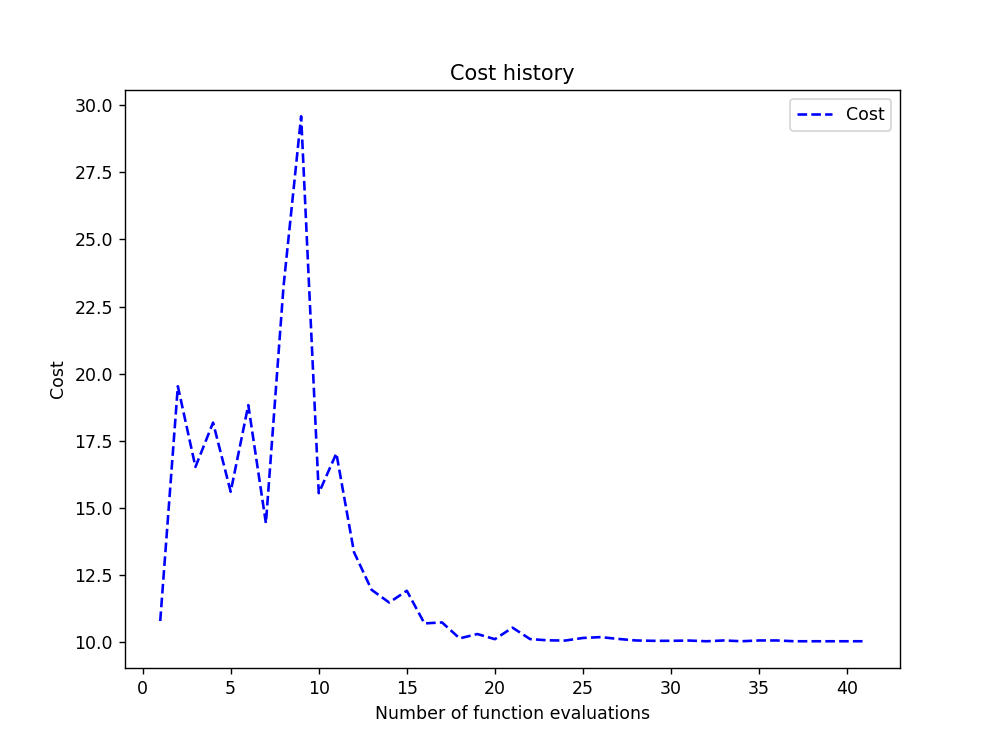

In [91]:
qaoa_new.result.plot_cost(figsize=(8,6))

Basically it was possible to get solution state by tuning parameters $\lambda_{1}$, $\lambda_{2}$, for example $\lambda_{1}$ = 2.7603, $\lambda_{2} = 0.2371$.

Can we avoid guessing and use Nelder-Mead optimization method that was mentioned in paper?

In [92]:
from scipy.optimize import minimize, LinearConstraint, NonlinearConstraint

In [93]:
def cost_function(x):
    constant_vars = x[5:]
    l2, l1 = constant_vars[0], constant_vars[1]
    return 3*x[0] + 6*x[1] + 3*x[2] + 4*x[3] + 5*x[4] + l2*(3*x[0] + 5*x[1] + 6*x[2] + 2*x[3] + 4*x[4] - 13)**2 + l1*(3*x[0] + 5*x[1] + 6*x[2] + 2*x[3] + 4*x[4] - 13)

Initial lambda parameters according to https://github.com/entropicalabs/openqaoa/blob/d82f2a700f00d92f384a6e1af9db7781061f37b1/src/openqaoa-core/problems/converters.py#L15

In [94]:
l2 = 0.1
l1 = 0.5

Let's try to add a nonlinear constraint to weight

In [95]:
def constraint1(x):
    return 3*x[0] + 5*x[1] + 6*x[2] + 2*x[3] + 4*x[4]

non_linear_weigth_constraint = NonlinearConstraint(constraint1, 0, 13)

and linear constraint

In [96]:
linear_weigth_constraint = LinearConstraint([3, 5, 6, 2, 4, 0, 0], 0, 13)

In [97]:
guess = [0, 0, 0, 1, 1, l2, l1]
bounds = [(0, 1)] * 5 + [(None, None)] * 2

In [100]:
result = minimize(cost_function, guess, method="nelder-mead", bounds=bounds, constraints=linear_weigth_constraint, tol=0.1)

optimal_binary_x = [int(round(i)) for i in result.x[:5]]
optimal_constant_vars = result.x[5:]

print("Optimal Solution:")
print("Binary variables (x):", optimal_binary_x)
print("Constant variables:", optimal_constant_vars)
print("Objective value:", result.fun)
print('Status : %s' % result['message'])
print('Total Evaluations: %d' % result['nfev'])

solution = result['x']
print(result)

Optimal Solution:
Binary variables (x): [0, 0, 0, 1, 1]
Constant variables: [1.28630966e+15 1.39742685e+16]
Objective value: -3.556870610660184e+16
Status : Maximum number of function evaluations has been exceeded.
Total Evaluations: 1400
       message: Maximum number of function evaluations has been exceeded.
       success: False
        status: 1
           fun: -3.556870610660184e+16
             x: [ 0.000e+00  4.307e-01  1.294e-01  1.000e+00  1.000e+00
                  1.286e+15  1.397e+16]
           nit: 1007
          nfev: 1400
 final_simplex: (array([[ 0.000e+00,  4.307e-01, ...,  1.286e+15,
                         1.397e+16],
                       [ 0.000e+00,  5.312e-01, ...,  1.333e+15,
                         1.448e+16],
                       ...,
                       [ 0.000e+00,  6.519e-01, ...,  1.242e+15,
                         1.349e+16],
                       [ 0.000e+00,  6.845e-01, ...,  1.262e+15,
                         1.371e+16]]), array([-3.557e+

Unfortunately by experimenting with different parameters and constraints wasn't able to achieve any approximate values that were given in paper so probably it should be used more smarter way to calculate values for parameters lambda.

## Bonus

If you completed the notebook and to arrived at this point, congratulations! You did a great job on learning how to design a QUBO into quantum circuit. Remember that you need an account on qBraid and send us a DM to share the credits and to use a real QPU for this challenge and see the limitation of the NISQ era. You can consider and try to contribute to an important part of the quantum community working in the field of quantum optimization😊

# Acknowledgments

🎉🎉🎉 Special thanks to entropica Labs  for helping us create this challenge and being able to exploit their SDK, OpenQAOA. If you want to know more about OpenQAOA you will see their [discord channel](discord.gg/ana76wkKBd) 🎉🎉🎉 